In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV

In [19]:
train = pd.read_csv("D:/Machine Learning/Kaggle_COM_ML/Cirrhosis/train.csv", index_col=0)
train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


In [20]:
train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [42]:
test = pd.read_csv("D:/Machine Learning/Kaggle_COM_ML/Cirrhosis/test.csv", index_col=0)
test

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0


In [43]:
test_dum=pd.get_dummies(test,drop_first=True)
test_dum

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
id,,,,,,,,,,,,,,,,,,,
7905,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,False,False,False,True,False,False,False
7906,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,False,False,False,False,False,False,False
7907,51,13149,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,True,False,False,True,False,False,True
7908,2330,20510,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,False,False,False,False,False,False,False
7909,1615,21904,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,12279,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,True,False,False,False,False,False,False
13172,1770,24803,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,True,False,False,False,False,False,False
13173,3707,16990,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,False,False,False,True,False,False,False


In [23]:
X=train.drop(['Status'],axis=1)
le=LabelEncoder()
y =le.fit_transform(train['Status'])

In [24]:
X_dum=pd.get_dummies(X,drop_first=True)
X_dum

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
id,,,,,,,,,,,,,,,,,,,
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,False,True,False,False,False,False,False
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,True,False,False,False,False,False,False
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,True,False,False,True,True,False,True
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,True,False,False,False,False,False,False
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,16839,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,False,False,False,False,False,False,False
7901,1492,17031,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,True,False,False,True,False,False,False
7902,1576,25873,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,False,False,False,False,True,True,False


In [25]:
y

array([2, 0, 2, ..., 2, 2, 0])

In [26]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

In [27]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_dum, y)

DecisionTreeClassifier(random_state=24)

In [29]:
# For Neg log loss is best for classification


params = {'min_samples_split': [2,4,6,10,20],
          'min_samples_leaf' : [1,5,10,15],
          'max_depth' : [None, 4, 3, 2]}
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X_dum,y)

print(gcv.best_score_)
print(gcv.best_params_)
 


-0.5340365286032667
{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2}


In [34]:
best_tree = gcv.best_estimator_

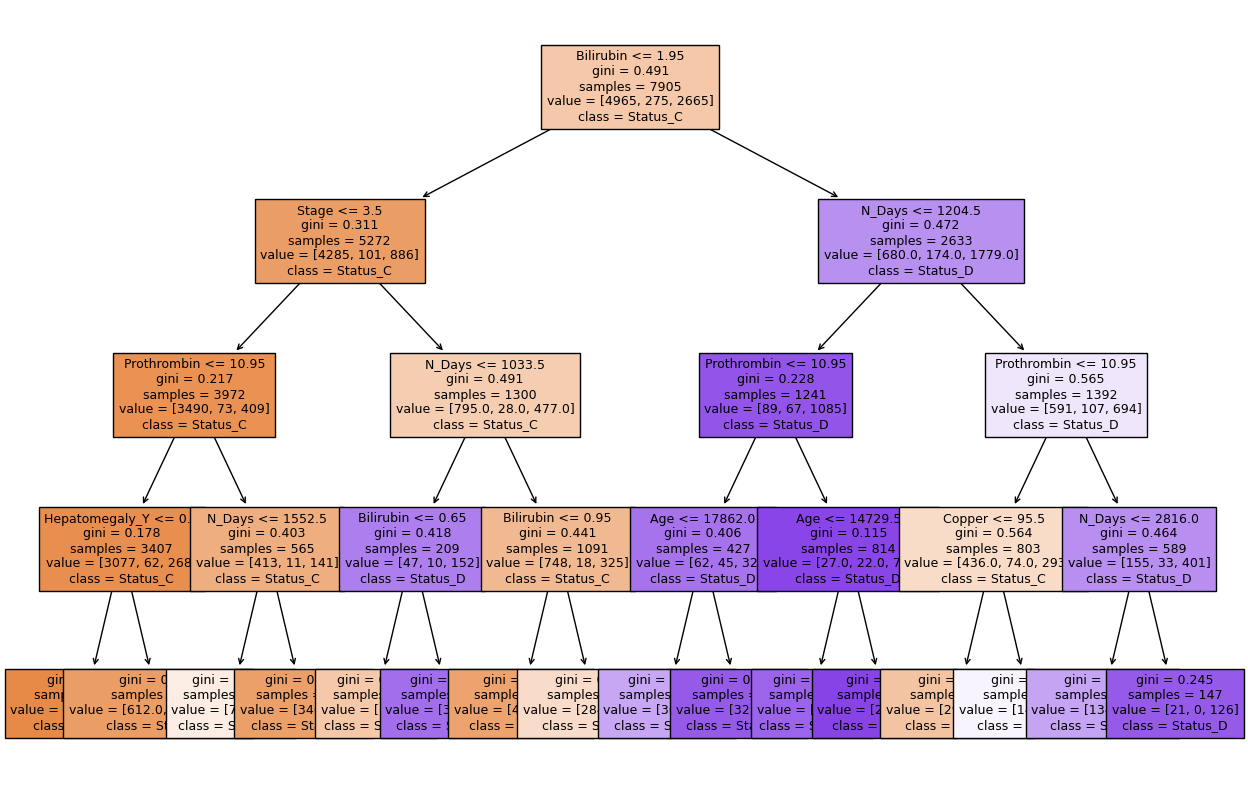

In [35]:
plt.figure(figsize=(15,10))                  #dtc tree with max_depth=None, and direct fitting 
                                             #without using gcv search
plot_tree(best_tree,feature_names=list(X_dum.columns),
               class_names=['Status_C', 'Status_CL', 'Status_D'],
               filled=True,fontsize=9)
plt.show()

In [36]:
print(best_tree.feature_importances_)

[0.17009887 0.00925741 0.64934962 0.         0.         0.00867425
 0.         0.         0.         0.         0.06621914 0.08722391
 0.         0.         0.         0.00917681 0.         0.
 0.        ]


In [37]:
df_imp1 = pd.DataFrame({'Feature': list(X_dum.columns), 'Importance':best_tree.feature_importances_ })
df_imp1

,Feature,Importance
0,N_Days,0.170099
1,Age,0.009257
2,Bilirubin,0.649350
3,Cholesterol,0.000000
4,Albumin,0.000000
5,Copper,0.008674
6,Alk_Phos,0.000000
7,SGOT,0.000000
8,Tryglicerides,0.000000
9,Platelets,0.000000


<Axes: ylabel='Feature'>

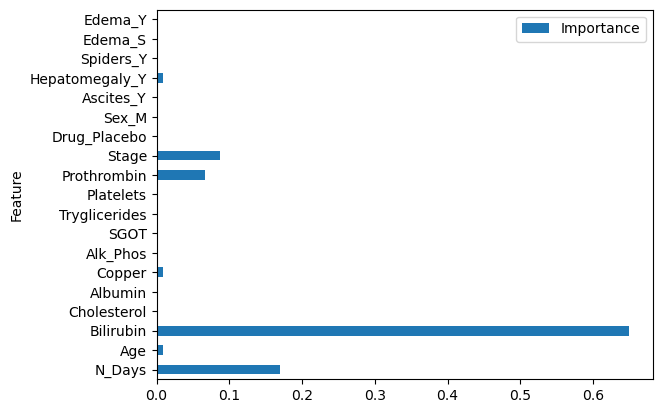

In [38]:
df_imp1.plot(kind='barh',x='Feature')

In [71]:
y_pred_prob=gcv.predict_proba(test_dum)
y_pred_prob

Index([ 7905,  7906,  7907,  7908,  7909,  7910,  7911,  7912,  7913,  7914,
       ...
       13166, 13167, 13168, 13169, 13170, 13171, 13172, 13173, 13174, 13175],
      dtype='int64', name='id', length=5271)


In [72]:
submit=pd.DataFrame({'id':test_dum.index, 'Status_C': y_pred_prob[:,0] , 'Status_CL': y_pred_prob[:,1], 'Status_D': y_pred_prob[:,2]})

In [73]:
submit

,id,Status_C,Status_CL,Status_D
0,7905,0.810596,0.031788,0.157616
1,7906,0.929487,0.014329,0.056184
2,7907,0.063492,0.126984,0.809524
3,7908,0.929487,0.014329,0.056184
4,7909,0.810596,0.031788,0.157616
...,...,...,...,...
5266,13171,0.929487,0.014329,0.056184
5267,13172,0.929487,0.014329,0.056184
5268,13173,0.810596,0.031788,0.157616
5269,13174,0.929487,0.014329,0.056184


In [74]:
submit.to_csv("Cirrosis_sub.csv", index=False)